In [1]:
from model.GP_model import GP
import numpy as np
from matplotlib import pyplot as plt
import jax.numpy as jnp

/home/lolanff/plant-rl/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/lolanff/plant-rl/.venv/lib/python3.12/site-packages/cola/backends/backends.py:75: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(cls, tree_flatten, tree_unflatten)


In [2]:
# Retrieve cleaned data
data = np.load("mean_size_1day.npy")
input_data = data[:, 0].reshape(-1, 1)  # input = [morning area, one-hot action]
output_data = data[:, -1].reshape(-1, 1)  # output = [next morning area]

In [3]:
def normalize_data(data):
    # normalize every intput dimension
    norm_data = []
    for i in range(data.shape[1]):
        input_mean = data[:, i].mean()
        input_std = data[:, i].std()
        col = []
        for j in range(data.shape[0]):
            normalized_state = (data[j, i] - input_mean) / input_std
            col.append(normalized_state)
        norm_data.append(col)

    return jnp.vstack(norm_data).T

In [4]:
GP_model = GP(input_data, output_data)  # , kernel = gpx.kernels.RBF())

/home/lolanff/plant-rl/.venv/lib/python3.12/site-packages/cola/backends/backends.py:75: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(cls, tree_flatten, tree_unflatten)
/home/lolanff/plant-rl/.venv/lib/python3.12/site-packages/cola/backends/backends.py:75: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(cls, tree_flatten, tree_unflatten)


Optimization terminated successfully.
         Current function value: -139.125893
         Iterations: 15
         Function evaluations: 23
         Gradient evaluations: 23


In [5]:
x_test = np.linspace(-2, 5, 50).reshape(-1, 1)
predictive_mean, predictive_std = GP_model.predict_mean_std(x_test)

/home/lolanff/plant-rl/.venv/lib/python3.12/site-packages/cola/backends/backends.py:75: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(cls, tree_flatten, tree_unflatten)


/tmp/ipykernel_109947/2535445599.py:13: DeprecationWarning: vstack requires ndarray or scalar arguments, got <class 'list'> at position 0. In a future JAX release this will be an error.
  return jnp.vstack(norm_data).T


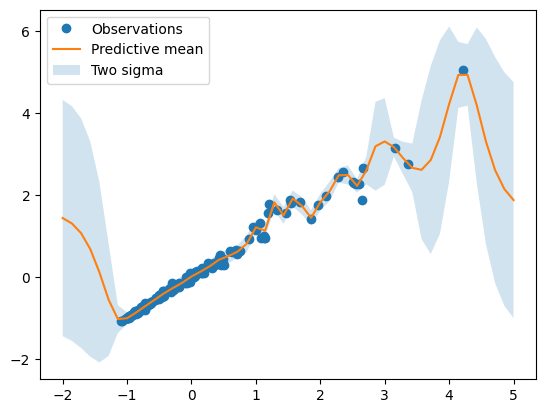

In [6]:
fig, ax = plt.subplots()
ax.plot(
    normalize_data(input_data), normalize_data(output_data), "o", label="Observations"
)
ax.plot(x_test, predictive_mean, label="Predictive mean")
ax.fill_between(
    x_test.squeeze(),
    predictive_mean - 2 * predictive_std,
    predictive_mean + 2 * predictive_std,
    alpha=0.2,
    label="Two sigma",
)
ax.legend(loc="best")

In [7]:
test_value = 35
GP_model.sample_output(x=np.array(test_value).reshape(-1, 1), N=10)

[Array([82.87858995], dtype=float64),
 Array([36.01515042], dtype=float64),
 Array([44.69144261], dtype=float64),
 Array([57.72175322], dtype=float64),
 Array([114.28791785], dtype=float64),
 Array([14.96255085], dtype=float64),
 Array([40.28790005], dtype=float64),
 Array([51.19584167], dtype=float64),
 Array([66.18750574], dtype=float64),
 Array([99.39323687], dtype=float64)]